In [1]:
import torch
import torch.nn.functional as tF
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

from otm import den2seq

In [2]:
datadir = 'samples'
imid =  'pseudo' # 'real' # 

(640, 1024, 3)


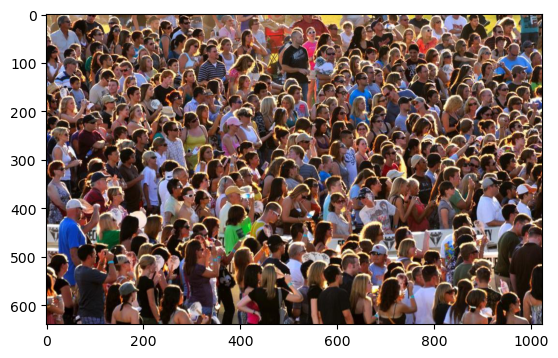

In [3]:
img = np.array(Image.open(os.path.join(datadir, f'{imid}.jpg')))
imh, imw = img.shape[:2]
print(img.shape)
plt.imshow(img)

(640, 1024, 3) torch.Size([320, 512]) 2.0


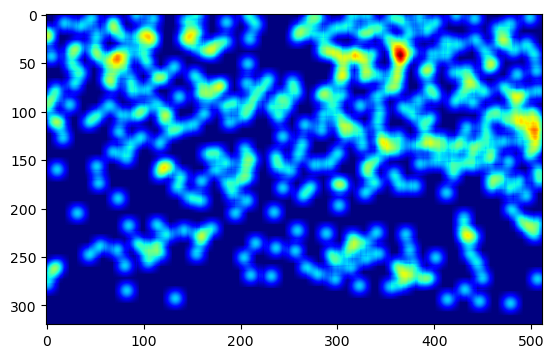

In [4]:
denmap = torch.load(os.path.join(datadir, f"{imid}.pth"))
dh, dw = denmap.shape
scale_factor = imw / dw
print(img.shape, denmap.shape, scale_factor)

plt.imshow(denmap.cpu(), cmap='jet')

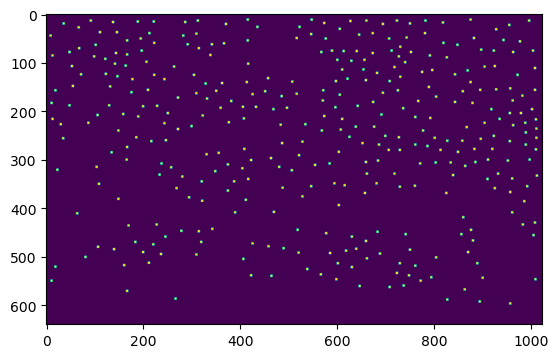

In [6]:
# perform OT-M
dot = den2seq(denmap, scale_factor, ot_scaling=0.75)

dot_coord = dot.long().cpu()
dotmap = torch.zeros((imh, imw))
dotmap[dot_coord[:, 0], dot_coord[:, 1]] = 1
dotmap = tF.conv2d(dotmap[None, None, ...], torch.ones((1, 1, 5, 5)), padding=2)[0, 0]

plt.imshow(dotmap)